## Exploratory Data Analysis (NOTEBOOK 2 OF 3)

Combine all data including Flight data, Weather data, NFL Game data, and 2023 USA Eras Tour Data.
Clean and preprocess data, handle missing values, encode categorical variables, and perform feature scaling.
Important Note: Due to the large amount of memory being used, this is continued from the exploratory_data_analysis1 file.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [116]:
# Load dataset with information about the flights, airports, and IATA information
flights_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\flights_airport_iata.csv", low_memory=False)


In [117]:
# Load dataset with information about the weatherl, locations, and nearest and IATA information
weather_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\weather_iata.csv", low_memory=False)

In [118]:
print(flights_data.columns)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'latitude', 'longitude',
       'iata_dest', 'airport_name_dest', 'latitude_dest', 'longitude_dest',
       'state_abbr_dest', 'airport_ref', 'airport_ident', 'type_of_airport',
       'airport_name', 'elevation_ft', 'origin_state.1', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft'],
      

In [119]:
# Rename columns in flights_data
flights_data = flights_data.rename(columns={
    'latitude': 'origin_latitude',
    'longitude': 'origin_longitude',
    'latitude_dest': 'dest_latitude',
    'longitude_dest': 'dest_longitude'
})

# Check the updated columns to confirm the changes
print(flights_data.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshol

In [120]:
flights_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state,iata,origin_latitude,origin_longitude,iata_dest,airport_name_dest,dest_latitude,dest_longitude,state_abbr_dest,airport_ref,airport_ident,type_of_airport,airport_name,elevation_ft,origin_state.1,municipality,scheduled_service,unique_id,id,length_ft,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,cvg,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,mn,3471,KCVG,large_airport,Cincinnati Northern Kentucky International Air...,896.0,KY,Cincinnati / Covington,yes,37447,240940,12000.0,150.0,PEM,1,0,09,NaN,27,NaN
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,cvg,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,mn,3471,KCVG,large_airport,Cincinnati Northern Kentucky International Air...,896.0,KY,Cincinnati / Covington,yes,37447,240941,11000.0,150.0,PEM,1,0,18C,NaN,36C,NaN
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,cvg,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,mn,3471,KCVG,large_airport,Cincinnati Northern Kentucky International Air...,896.0,KY,Cincinnati / Covington,yes,37447,240943,10000.0,150.0,CON,1,0,18L,NaN,36R,NaN
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,cvg,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,mn,3471,KCVG,large_airport,Cincinnati Northern Kentucky International Air...,896.0,KY,Cincinnati / Covington,yes,37447,240942,8000.0,150.0,CON,1,0,18R,NaN,36L,NaN
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,1744.0,15.0,1759.0,1845.0,9.0,1905,1854.0,0.0,0.0,75.0,70.0,46.0,1.0,232.0,1,NaN,NaN,NaN,NaN,NaN,ia,mn,dsm,41.5340,-93.6631,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,mn,3496,KDSM,medium_airport,Des Moines International Airport,958.0,IA,Des Moines,yes,37567,244170,9003.0,150.0,ASP,1,0,05,NaN,23,NaN


In [121]:
# Check unique values in each delay column
unique_values = flights_data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].nunique()
print(unique_values)


carrier_delay          1533
weather_delay           967
nas_delay               730
security_delay          182
late_aircraft_delay    1269
dtype: int64


In [122]:
print(weather_data.columns)

Index(['latitude', 'longitude', 'elevation', 'date', 'prcp', 'snow', 'snwd',
       'tmax', 'tmin', 'tobs', 'city', 'state_abbr_x', 'iata', 'airport_name',
       'state_abbr_y'],
      dtype='object')


In [123]:
weather_data[['state_abbr_x', 'state_abbr_y']]


,state_abbr_x,state_abbr_y
0,al,al
1,al,al
2,al,al
3,al,al
4,al,al
...,...,...
146017,wy,wy
146018,wy,wy
146019,wy,wy
146020,wy,wy


In [124]:
weather_data = weather_data.drop(columns=['state_abbr_x', 'state_abbr_y'])
#weather_data = weather_data.rename(columns={'state_abbr_y': 'state'})


In [125]:
weather_data.columns

Index(['latitude', 'longitude', 'elevation', 'date', 'prcp', 'snow', 'snwd',
       'tmax', 'tmin', 'tobs', 'city', 'iata', 'airport_name'],
      dtype='object')

In [126]:
# Create a dictionary to map the original columns to their new names with '_dest' suffix
columns_to_copy = ['latitude', 'longitude', 'elevation', 'prcp', 'snow', 'snwd', 'tmax', 'tmin', 'city', 'iata']

# Create a copy of each column with '_dest' suffix
for col in columns_to_copy:
    weather_data[f'{col}_dest'] = weather_data[col]

# Rename the original columns to have the '_orig' suffix
rename_dict = {col: f'{col}_orig' for col in columns_to_copy}
weather_data = weather_data.rename(columns=rename_dict)

# Verify the changes
print("Columns after renaming and copying:")
print(weather_data.columns.tolist())


Columns after renaming and copying:
['latitude_orig', 'longitude_orig', 'elevation_orig', 'date', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'city_orig', 'iata_orig', 'airport_name', 'latitude_dest', 'longitude_dest', 'elevation_dest', 'prcp_dest', 'snow_dest', 'snwd_dest', 'tmax_dest', 'tmin_dest', 'city_dest', 'iata_dest']


In [127]:
# Merge for destination weather data
combined_data = flights_data.merge(
    weather_data,
    left_on=['date', 'dest_iata'],
    right_on=['date', 'iata_dest'],
    how='left',
    suffixes=('', '_dest')
)

# Check the columns after the merge
print("After merging with destination weather:")
print(combined_data.columns)


After merging with destination weather:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold

In [128]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)

day_of_week           0.000000
date                  0.000000
op_unique_carrier     0.000000
tail_num              0.281373
op_carrier_fl_num     0.000000
                       ...    
snwd_dest            88.759559
tmax_dest            84.961635
tmin_dest            84.964233
city_dest            84.620325
iata_dest_dest       84.620325
Length: 81, dtype: float64


In [129]:

# Check for NaN rows if necessary
nan_rows = combined_data[combined_data['iata'].isnull()]
print(nan_rows)


Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, tail_num, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, distance_group, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, iata, origin_latitude, origin_longitude, iata_dest, airport_name_dest, dest_latitude, dest_longitude, state_abbr_dest, airport_ref, airport_ident, type_of_airport, airport_name, elevation_ft, origin_state.1, municipality, scheduled_service, unique_id, id, length_ft, width_ft, surface, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, latitude_orig, longitude_orig, elevation_orig, prcp_orig, snow_orig, snwd_orig, tmax_orig, tmin_orig, tobs, city_orig, iata_orig, airport_name_dest, latitude_dest, longitude_dest, ele

In [130]:
# Define the columns to be removed
columns_to_remove = ['city',
    'origin_state.1', 'iata', 'state_abbr_dest', 'airport_ident'
]

# Drop the specified columns
combined_data = combined_data.drop(columns=columns_to_remove, errors='ignore')

# Check the new shape of the DataFrame
print("New data shape after removing specified columns:", combined_data.shape)


New data shape after removing specified columns: (15204359, 77)


In [131]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state,origin_latitude,origin_longitude,iata_dest,airport_name_dest,dest_latitude,dest_longitude,airport_ref,type_of_airport,airport_name,elevation_ft,municipality,scheduled_service,unique_id,id,length_ft,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft,latitude_orig,longitude_orig,elevation_orig,prcp_orig,snow_orig,snwd_orig,tmax_orig,tmin_orig,tobs,city_orig,iata_orig,airport_name_dest,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest,city_dest,iata_dest_dest
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,3471,large_airport,Cincinnati Northern Kentucky International Air...,896.0,Cincinnati / Covington,yes,37447,240940,12000.0,150.0,PEM,1,0,09,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,3471,large_airport,Cincinnati Northern Kentucky International Air...,896.0,Cincinnati / Covington,yes,37447,240941,11000.0,150.0,PEM,1,0,18C,NaN,36C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,3471,large_airport,Cincinnati Northern Kentucky International Air...,896.0,Cincinnati / Covington,yes,37447,240943,10000.0,150.0,CON,1,0,18L,NaN,36R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,3,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,3471,large_airport,Cincinnati Northern Kentucky International Air...,896.0,Cincinnati / Covington,yes,37447,240942,8000.0,150.0,CON,1,0,18R,NaN,36L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,1744.0,15.0,1759.0,1845.0,9.0,1905,1854.0,0.0,0.0,75.0,70.0,46.0,1.0,232.0,1,NaN,NaN,NaN,NaN,NaN,ia,mn,41.5340,-93.6631,msp,minneapolis-saint paul international airport (...,44.882,-93.2218,3496,medium_airport,Des Moines International Airport,958.0,Des Moines,yes,37567,244170,9003.0,150.0,ASP,1,0,05,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
combined_data.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'iata_dest', 'airport_name_dest', 'dest_latitude', 'dest_longitude',
       'airport_ref', 'type_of_airport', 'airport_name', 'elevation_ft',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'latitude_orig', 'longitude_orig', 'elevation_orig', 'p

In [133]:
# Remove duplicate rows from the DataFrame
# Remove duplicate rows, keeping 'origin_state' and 'dest_state'
combined_data = combined_data.drop_duplicates(subset=combined_data.columns.difference(['origin_state', 'dest_state']).tolist())

# Display the shape of the cleaned DataFrame to check for changes
print("Shape of DataFrame after removing duplicate rows:")
print(combined_data.shape)

# display the first few rows to verify
print("First few rows of the cleaned DataFrame:")
print(combined_data.head())

Shape of DataFrame after removing duplicate rows:
(15118733, 77)
First few rows of the cleaned DataFrame:
   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  dep_time  \
0         cvg  cincinnati       msp  minneapolis          1234    1225.0   
1         cvg  cincinnati       msp  minneapolis          1234    1225.0   
2         cvg  cincinnati       msp  minneapolis          1234    1225.0   
3         cvg  cincinnati       msp  minneapolis          1234    1225.0   
4         dsm  des moines       msp  minneapolis         

In [134]:
print(combined_data.shape)
print(weather_data.shape) 
print(flights_data.shape)  


(15118733, 77)
(146022, 23)
(15094416, 59)


In [135]:
# Check for missing values
print(combined_data.isnull().sum())

day_of_week                 0
date                        0
op_unique_carrier           0
tail_num                42547
op_carrier_fl_num           0
                       ...   
snwd_dest            13477068
tmax_dest            12916182
tmin_dest            12916577
city_dest            12865978
iata_dest_dest       12865978
Length: 77, dtype: int64


In [136]:
combined_data.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'iata_dest', 'airport_name_dest', 'dest_latitude', 'dest_longitude',
       'airport_ref', 'type_of_airport', 'airport_name', 'elevation_ft',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'latitude_orig', 'longitude_orig', 'elevation_orig', 'p

In [137]:
# Drop the specified columns
combined_data = combined_data.drop(columns=[ 'airport_name_dest', 'airport_name', 'distance_group', 'airport_ref'])

# Print the new shape of the DataFrame to confirm the columns were removed
print("New data shape after removing specified columns:", combined_data.shape)


New data shape after removing specified columns: (15118733, 72)


In [138]:
combined_data.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'iata_dest', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',

In [139]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)


day_of_week           0.000000
date                  0.000000
op_unique_carrier     0.000000
tail_num              0.281419
op_carrier_fl_num     0.000000
                       ...    
snwd_dest            89.141517
tmax_dest            85.431643
tmin_dest            85.434256
city_dest            85.099578
iata_dest_dest       85.099578
Length: 72, dtype: float64


In [140]:
# Impute missing values for numerical variables using median
for col in ['dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
            'arr_time', 'actual_elapsed_time', 'air_time']:
    combined_data[col] = combined_data[col].fillna(combined_data[col].median())

# Impute missing values for the categorical variable
combined_data['tail_num'] = combined_data['tail_num'].fillna(combined_data['tail_num'].mode()[0])

In [141]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)


day_of_week           0.000000
date                  0.000000
op_unique_carrier     0.000000
tail_num              0.000000
op_carrier_fl_num     0.000000
                       ...    
snwd_dest            89.141517
tmax_dest            85.431643
tmin_dest            85.434256
city_dest            85.099578
iata_dest_dest       85.099578
Length: 72, dtype: float64


In [142]:
# Calculate the missing percentage for each column
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100

# Filter and display columns with missing percentage > 0
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the columns with missing percentage
print("Columns with missing values (percentage > 0):")
print(missing_percentage)


Columns with missing values (percentage > 0):
carrier_delay                79.309609
weather_delay                79.309609
nas_delay                    79.309609
security_delay               79.309609
late_aircraft_delay          79.309609
le_displaced_threshold_ft    90.094011
he_displaced_threshold_ft    90.581473
latitude_orig                85.099578
longitude_orig               85.099578
elevation_orig               85.122001
prcp_orig                    85.187873
snow_orig                    87.067296
snwd_orig                    89.141517
tmax_orig                    85.431643
tmin_orig                    85.434256
tobs                         99.890024
city_orig                    85.099578
iata_orig                    85.099578
latitude_dest                85.099578
longitude_dest               85.099578
elevation_dest               85.122001
prcp_dest                    85.187873
snow_dest                    87.067296
snwd_dest                    89.141517
tmax_dest         

In [143]:
# Define the columns to sum for weather_indicator
weather_columns = [
    'prcp_dest', 'snow_dest', 'snwd_dest', 'tmax_dest', 'tmin_dest', 'city_dest',
    'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'city_orig', 'weather_delay'
]

# Define the columns to sum for airport_indicator
airport_columns = [
    'carrier_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'le_displaced_threshold_ft',
    'he_displaced_threshold_ft', 'latitude_orig', 'longitude_orig', 'elevation_orig', 'iata_orig',
    'latitude_dest', 'longitude_dest', 'elevation_dest', 'city_dest', 'iata_dest'
]

# Ensure all columns are numeric
combined_data[weather_columns] = combined_data[weather_columns].apply(pd.to_numeric, errors='coerce')
combined_data[airport_columns] = combined_data[airport_columns].apply(pd.to_numeric, errors='coerce')

# Create the new columns by summing the specified columns
combined_data['weather_indicator'] = combined_data[weather_columns].sum(axis=1, skipna=True)
combined_data['airport_indicator'] = combined_data[airport_columns].sum(axis=1, skipna=True)

# Verify the new columns
print("After creating 'weather_indicator' and 'airport_indicator':")
print(combined_data[['weather_indicator', 'airport_indicator']].head())


After creating 'weather_indicator' and 'airport_indicator':
   weather_indicator  airport_indicator
0                0.0                0.0
1                0.0                0.0
2                0.0                0.0
3                0.0                0.0
4                0.0                0.0


In [144]:
# Filter rows where both 'weather_indicator' and 'airport_indicator' are greater than 0
filtered_data = combined_data[(combined_data['weather_indicator'] > 0) & (combined_data['airport_indicator'] > 0)]

# Show the first few rows of the filtered data
print("Filtered data where weather_indicator and airport_indicator > 0:")
print(filtered_data[['weather_indicator', 'airport_indicator']].head())


Filtered data where weather_indicator and airport_indicator > 0:
    weather_indicator  airport_indicator
11             226.06         724.800000
14             226.06         622.800000
15             226.06        1214.800000
61             240.00          42.240006
62             240.00          42.240006


In [145]:
# Save the DataFrame to a CSV file
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv'

combined_data.to_csv(file_path, index=False)

#print("Data saved to C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv")
# LAST SAVED 11.6.24 at 4:33pm

In [146]:
# Inspect the data

Flights Data:
Carrier Delay:
Imputation: I believe the missing values might be due to missing reports rather than actual absence of delay, so I am imputing these values with the average delay for that airline or flight.
Drop: If the missing values are too many and could skew the analysis, consider dropping the carrier_delay column if it’s not critical for analysis.


Weather Data:
Snow and Snow Depth:
Imputation: Fill in missing values with 0 (assuming no snow) or use interpolation or forward/backward filling methods based on surrounding data.
Drop: If a significant portion of your analysis requires snow data and the missing values are large, consider dropping those rows or the columns if they don’t contribute significantly to analysis.

Investigating duplicate rows: By conducting these analyses, I am trying to identify whether there are any underlying issues with the data that could be contributing to the duplicates and gain a clearer understanding of the variability present in the dataset.

In [150]:
# Check for duplicates
print("Number of combined_data duplicates: " + str(combined_data.duplicated().sum()))


Number of combined_data duplicates: 0


In [151]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,dest_state,origin_latitude,origin_longitude,iata_dest,dest_latitude,dest_longitude,type_of_airport,elevation_ft,municipality,scheduled_service,unique_id,id,length_ft,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft,latitude_orig,longitude_orig,elevation_orig,prcp_orig,snow_orig,snwd_orig,tmax_orig,tmin_orig,tobs,city_orig,iata_orig,latitude_dest,longitude_dest,elevation_dest,prcp_dest,snow_dest,snwd_dest,tmax_dest,tmin_dest,city_dest,iata_dest_dest,weather_indicator,airport_indicator
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,NaN,44.882,-93.2218,large_airport,896.0,Cincinnati / Covington,yes,37447,240940,12000.0,150.0,PEM,1,0,09,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,NaN,44.882,-93.2218,large_airport,896.0,Cincinnati / Covington,yes,37447,240941,11000.0,150.0,PEM,1,0,18C,NaN,36C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,NaN,44.882,-93.2218,large_airport,896.0,Cincinnati / Covington,yes,37447,240943,10000.0,150.0,CON,1,0,18L,NaN,36R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,1225.0,13.0,1238.0,1303.0,7.0,1341,1310.0,0.0,0.0,127.0,105.0,85.0,1.0,596.0,NaN,NaN,NaN,NaN,NaN,oh,mn,39.0488,-84.6678,NaN,44.882,-93.2218,large_airport,896.0,Cincinnati / Covington,yes,37447,240942,8000.0,150.0,CON,1,0,18R,NaN,36L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,1744.0,15.0,1759.0,1845.0,9.0,1905,1854.0,0.0,0.0,75.0,70.0,46.0,1.0,232.0,NaN,NaN,NaN,NaN,NaN,ia,mn,41.5340,-93.6631,NaN,44.882,-93.2218,medium_airport,958.0,Des Moines,yes,37567,244170,9003.0,150.0,ASP,1,0,05,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [152]:
print(combined_data.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'iata_dest', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',

In [153]:
# Feature engineering

# Create new features
combined_data['total_delay_time'] = combined_data['actual_elapsed_time'] - combined_data['crs_elapsed_time']
combined_data['is_weekend'] = combined_data['day_of_week'].isin([5, 6]).astype(int)  # Saturday and Sunday

In [154]:
# crs_arr_time and arr_time are in HHMM format, convert them to minutes
combined_data['crs_arr_time'] = combined_data['crs_arr_time'] // 100 * 60 + combined_data['crs_arr_time'] % 100
combined_data['arr_time'] = combined_data['arr_time'] // 100 * 60 + combined_data['arr_time'] % 100

In [155]:
# Calculate arrival delay
combined_data['arrival_delay'] = combined_data['arr_time'] - combined_data['crs_arr_time']

In [156]:
# Assuming crs_dep_time and dep_time are also in HHMM format, convert them similarly
combined_data['crs_dep_time'] = combined_data['crs_dep_time'] // 100 * 60 + combined_data['crs_dep_time'] % 100
combined_data['dep_time'] = combined_data['dep_time'] // 100 * 60 + combined_data['dep_time'] % 100

In [157]:
# Calculate departure delay
combined_data['departure_delay'] = combined_data['dep_time'] - combined_data['crs_dep_time']


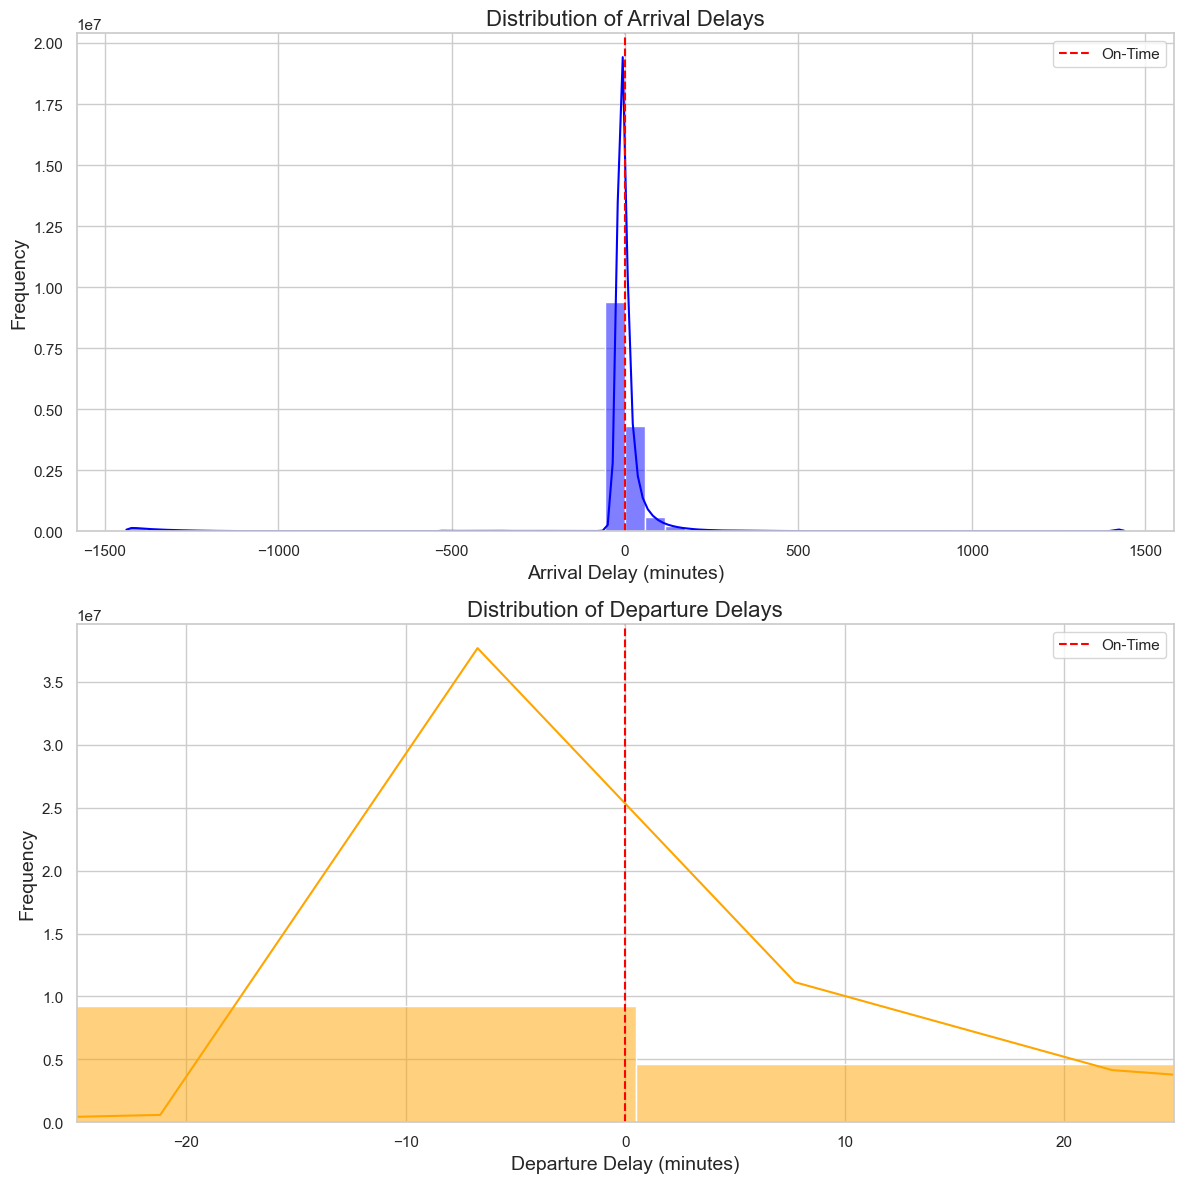

In [158]:
# Plot distribution of arrival delays
# Set the plot style
sns.set(style='whitegrid')

# Create subplots for arrival and departure delays
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plotting Arrival Delays
sns.histplot(combined_data['arrival_delay'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Arrival Delays', fontsize=16)
axes[0].set_xlabel('Arrival Delay (minutes)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].axvline(x=0, color='red', linestyle='--', label='On-Time')

#Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[0].legend()

# Plotting Departure Delays
sns.histplot(combined_data['departure_delay'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Departure Delays', fontsize=16)
axes[1].set_xlabel('Departure Delay (minutes)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].axvline(x=0, color='red', linestyle='--', label='On-Time')

# Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [159]:
# Remove columns that contain only NaN values
combined_data = combined_data.dropna(axis=1, how='all')

In [160]:
print(combined_data.columns)
print(combined_data.shape)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [161]:
# Create a dictionary to track unique columns
unique_columns = {}
for col in combined_data.columns:
    if col not in unique_columns:
        unique_columns[col] = combined_data[col]

# Create a new DataFrame from the unique columns
combined_data = pd.DataFrame(unique_columns)

In [162]:
# Remove duplicate columns by keeping the first occurrence
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]


In [163]:
print(combined_data.columns)
print(combined_data.shape)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [164]:
print(combined_data.dtypes)

day_of_week            int64
date                  object
op_unique_carrier     object
tail_num              object
op_carrier_fl_num      int64
                      ...   
airport_indicator    float64
total_delay_time     float64
is_weekend             int32
arrival_delay        float64
departure_delay      float64
Length: 74, dtype: object


In [165]:
# Adjust pandas options to display all columns
pd.set_option('display.max_columns', None)  # None means no limit on the number of columns
pd.set_option('display.width', None)        # Removes line wrapping

# Now call describe to show all 58 columns
print(combined_data.describe())


        day_of_week  op_carrier_fl_num  crs_dep_time      dep_time  \
count  1.511873e+07       1.511873e+07  1.511873e+07  1.511873e+07   
mean   3.979462e+00       2.330569e+03  8.204061e+02  8.230529e+02   
std    2.005737e+00       1.531463e+03  2.994821e+02  3.066173e+02   
min    1.000000e+00       1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00       1.121000e+03  5.630000e+02  5.660000e+02   
50%    4.000000e+00       2.086000e+03  8.140000e+02  8.160000e+02   
75%    6.000000e+00       3.318000e+03  1.075000e+03  1.080000e+03   
max    7.000000e+00       8.819000e+03  1.439000e+03  1.440000e+03   

           taxi_out    wheels_off     wheels_on       taxi_in  crs_arr_time  \
count  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07   
mean   1.720585e+01  1.373766e+03  1.468022e+03  7.974593e+00  9.139659e+02   
std    9.006717e+00  5.134787e+02  5.475585e+02  6.406154e+00  3.177027e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

Key Observations from the Data
day_of_week: The mean value is about 4 (indicating that, on average, flights are distributed around the middle of the week, e.g., Wednesday).
crs_dep_time, dep_time, taxi_out, etc.: 
cancelled and diverted: Both are binary variables, with most flights not being cancelled or diverted. cancelled and divertedThe mean values are close to 0, indicating the relatively rare occurrences of these events.
Delays: carrier_delay has a mean of about 24 minutes, while weather_delay has a mean of around 4 minutes.
total_delay_time: 
This is a binary variable (0 = not weekend, 1 = weekend), with about 30% of flights occurring on weekends.

In [167]:
# View all duplicate rows
duplicate_rows = combined_data[combined_data.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, tail_num, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, origin_latitude, origin_longitude, dest_latitude, dest_longitude, type_of_airport, elevation_ft, municipality, scheduled_service, unique_id, id, length_ft, width_ft, surface, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, latitude_orig, longitude_orig, elevation_orig, prcp_orig, snow_orig, snwd_orig, tmax_orig, tmin_orig, tobs, latitude_dest, longitude_dest, elevation_dest, prcp_dest, snow_dest, snwd_dest, tmax_dest, tmin_dest, iata_dest_dest, weather_indicator, airport_indicator, total_delay_time, is_weekend, arrival_delay, d

In [168]:
# Handle Missing Values: fill or drop missing values (e.g., mean, median, mode, or dropping rows/columns)

# Drop duplicate rows, keeping the first occurrence
combined_data_cleaned = combined_data.drop_duplicates(keep='first')

# Reset the index after dropping duplicates
combined_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(combined_data_cleaned.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  dep_time  \
0         cvg  cincinnati       msp  minneapolis           754     745.0   
1         cvg  cincinnati       msp  minneapolis           754     745.0   
2         cvg  cincinnati       msp  minneapolis           754     745.0   
3         cvg  cincinnati       msp  minneapolis           754     745.0   
4         dsm  des moines       msp  minneapolis          1070    1064.0   

   taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  \
0      13.0    

In [169]:
print(combined_data_cleaned.memory_usage(deep=True).sum())


19822015979


In [170]:
# Downcast numeric columns
for col in combined_data_cleaned.select_dtypes(include=['float']):
    combined_data_cleaned[col] = pd.to_numeric(combined_data_cleaned[col], downcast='float')

for col in combined_data_cleaned.select_dtypes(include=['int']):
    combined_data_cleaned[col] = pd.to_numeric(combined_data_cleaned[col], downcast='integer')

# Convert object types to category if applicable
for col in combined_data_cleaned.select_dtypes(include=['object']):
    if combined_data_cleaned[col].nunique() / len(combined_data_cleaned) < 0.5:  # If less than 50% unique values
        combined_data_cleaned[col] = combined_data_cleaned[col].astype('category')


Investigating missing values

# flight_data
High missing values for carrier_delay, weather_delay, nas_delay, security_delay, and late_aircraft_delay, but we are keeping due to nature of information.
Moderate Missing Values: tail_num, dep_time, taxi_out, etc.: These have around 1-3% missing values. Filling these with the mean or median, as they are likely to still provide valuable information.

In [173]:
# Calculate the percentage of null values for each column
null_percentage_flights = combined_data_cleaned.isnull().mean() * 100

# Filter to show only columns with null values
null_percentage_flights = null_percentage_flights[null_percentage_flights > 0]

# Display the result
print(null_percentage_flights)

carrier_delay                79.309609
weather_delay                79.309609
nas_delay                    79.309609
security_delay               79.309609
late_aircraft_delay          79.309609
le_displaced_threshold_ft    90.094011
he_displaced_threshold_ft    90.581473
latitude_orig                85.099578
longitude_orig               85.099578
elevation_orig               85.122001
prcp_orig                    85.187873
snow_orig                    87.067296
snwd_orig                    89.141517
tmax_orig                    85.431643
tmin_orig                    85.434256
tobs                         99.890024
latitude_dest                85.099578
longitude_dest               85.099578
elevation_dest               85.122001
prcp_dest                    85.187873
snow_dest                    87.067296
snwd_dest                    89.141517
tmax_dest                    85.431643
tmin_dest                    85.434256
iata_dest_dest               85.099578
dtype: float64


In [174]:
# Look at how these delays correlate with each other
correlation_matrix = combined_data_cleaned[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].corr()
print(correlation_matrix)


                     carrier_delay  weather_delay  nas_delay  security_delay  \
carrier_delay             1.000000      -0.038135  -0.079259       -0.013054   
weather_delay            -0.038135       1.000000  -0.001680       -0.005752   
nas_delay                -0.079259      -0.001680   1.000000       -0.008261   
security_delay           -0.013054      -0.005752  -0.008261        1.000000   
late_aircraft_delay      -0.036769      -0.012014  -0.094955       -0.009661   

                     late_aircraft_delay  
carrier_delay                  -0.036769  
weather_delay                  -0.012014  
nas_delay                      -0.094955  
security_delay                 -0.009661  
late_aircraft_delay             1.000000  


Since the correlations are low, it implies that these types of delays do not influence each other significantly. For instance, an increase in carrier_delay does not correlate with an increase or decrease in weather_delay, nas_delay, etc.

Investigate Further: 

Time of year (seasonality)
Day of the week
Specific routes or airlines
Visual Analysis: Visualizing these relationships can also provide insights:

Scatter plots could help visualize the relationship between two delay types, even if correlations are low.
Boxplots can show the distribution of delays.

In [177]:
print(combined_data_cleaned.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [178]:
# Check unique airports reporting any delays
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
airports_with_delays = combined_data_cleaned[delay_columns].notnull().any(axis=1)
unique_airports = combined_data_cleaned[airports_with_delays]['origin_iata'].unique() #origin airport
print(f"Unique airports reporting delays: {len(unique_airports)}")
print(unique_airports)


Unique airports reporting delays: 267
['ind', 'myr', 'cho', 'sgf', 'atl', ..., 'dlg', 'bih', 'cod', 'cys', 'stc']
Length: 267
Categories (268, object): ['abi', 'abr', 'ack', 'act', ..., 'vps', 'wrg', 'wys', 'xna']


The consistent high percentage of null values for all delay types across different airports suggests a few possibilities:

Data Reporting Issues:

It’s possible that the dataset does not consistently report certain types of delays. If many flights are missing delay data, it could be that those types of delays are not applicable or not recorded for some flights.
Flight Types:

Certain types of flights (e.g., regional vs. international, or different airlines) may not report delay reasons uniformly. If a significant number of flights are not delayed for reasons recorded in these columns, the null values would be high.
Consistent Data Collection Methods:

If the data collection methods are consistent across all airports, this could also lead to similar null value patterns.

In [180]:
airline_mapping = {
    '9e': 'Envoy Air',
    'aa': 'American Airlines',
    'as': 'Alaska Airlines',
    'b6': 'JetBlue Airways',
    'dl': 'Delta Air Lines',
    'f9': 'Frontier Airlines',
    'g4': 'Allegiant Air',
    'ha': 'Hawaiian Airlines',
    'mq': 'Envoy Air',
    'nk': 'Spirit Airlines',
    'oh': 'Piedmont Airlines',
    'oo': 'SkyWest Airlines',
    'ua': 'United Airlines',
    'wn': 'Southwest Airlines',
    'yx': 'Republic Airways'
}


In [181]:
# Create a function to map codes to airport names
def map_airline_codes(codes):
    return airline_mapping.get(codes, 'Unknown Airline')

# apply function
combined_data_cleaned['airline_name'] = combined_data_cleaned['op_unique_carrier'].apply(map_airline_codes)

# View the updated DataFrame
print(combined_data_cleaned[['op_unique_carrier', 'airline_name']].head())



  op_unique_carrier airline_name
0                9e    Envoy Air
1                9e    Envoy Air
2                9e    Envoy Air
3                9e    Envoy Air
4                9e    Envoy Air


In [182]:
# Group by airline, origin, and destination to count missing data
missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()

# Print the result
print(missing_data_routes)

C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\253639609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()


airline_name     origin_iata  dest_iata
Alaska Airlines  abi          abe          0
                              abi          0
                              abq          0
                              aby          0
                              ack          0
                                          ..
United Airlines  xna          wys          0
                              xna          0
                              xwa          0
                              yak          0
                              yum          0
Length: 1121848, dtype: int64


In [183]:
# Sort results
missing_data_routes_sorted = missing_data_routes.sort_values(ascending=False)
print(missing_data_routes_sorted)

airline_name        origin_iata  dest_iata
American Airlines   dfw          lax          24507
                                 phx          21287
                                 ord          20503
Southwest Airlines  den          phx          20154
American Airlines   dfw          sat          19824
                                              ...  
Envoy Air           ome          mei              0
                                 mem              0
                                 mfe              0
                                 mfr              0
United Airlines     xna          yum              0
Length: 1121848, dtype: int64


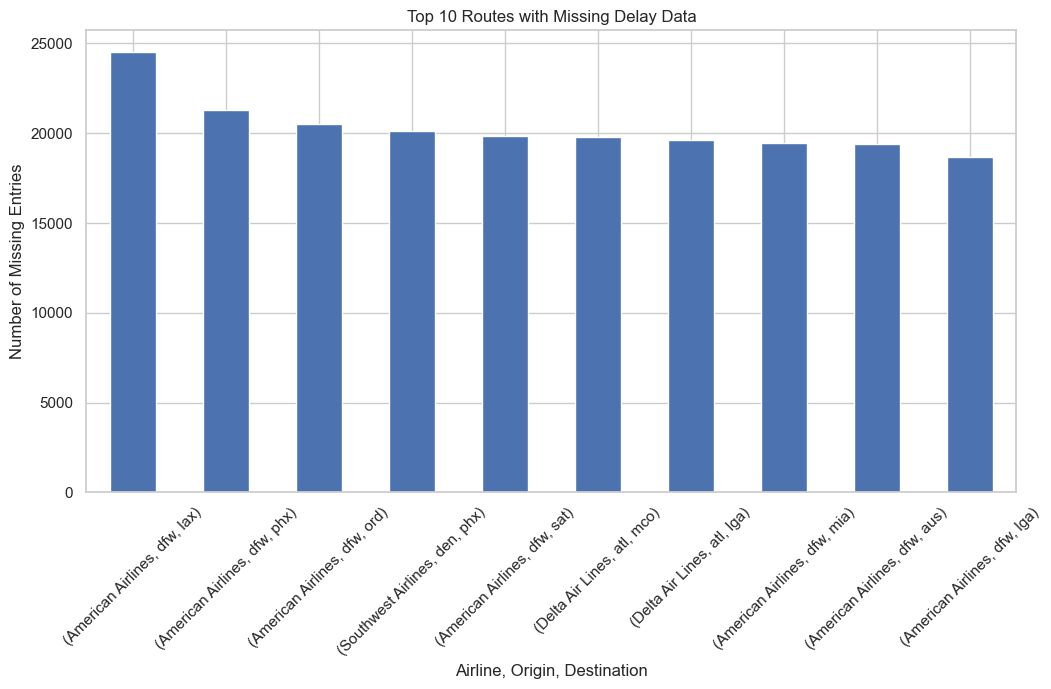

In [184]:
missing_data_routes_sorted.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Routes with Missing Delay Data')
plt.xlabel('Airline, Origin, Destination')
plt.ylabel('Number of Missing Entries')
plt.xticks(rotation=45)
plt.show()

In [185]:
print(type(missing_data_routes_sorted))



<class 'pandas.core.series.Series'>


In [186]:
missing_data_routes_sorted_df = missing_data_routes_sorted.to_frame(name='value')  # Name the Series


# Save to CSV 
# Assuming missing_data_routes_sorted_df is your DataFrame
missing_data_routes_sorted_df.to_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\missing_data_routes_sorted_df.csv", index=False)


# Load dataset
# Read the CSV file back into a DataFrame
missing_data_routes_sorted_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\missing_data_routes_sorted_df.csv")


Summary of Missing Delay Data by Airline

United Airlines (ua) and Southwest Airlines (wn) have the highest counts of missing delay data, with 339,040 and 638,415 entries missing, respectively.
American Airlines (aa) and Delta Airlines (dl) also show significant numbers of missing data, with 492,133 and 478,777 entries missing.
Other airlines like Alaska Airlines (as) and JetBlue Airways (b6) have comparatively fewer missing entries.

Possible Implications:

Airline Reporting Practices:
Airlines with a high number of missing delay entries may have different reporting practices or may be less consistent in reporting specific delay reasons.

Flight Type Differences:
The airlines with fewer missing entries may have flight routes or operational practices that more consistently record delays.

Potential Data Gaps:
A large number of missing values could indicate that certain flights or routes (especially those operated by the airlines with high missing data) may have delays that are not being reported for some reason.



In [189]:
# Investigate if there are specific routes or types of flights associated with these airlines that might also show a pattern in the missing data.

In [190]:
missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()
print(missing_data_routes)

C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\4215762221.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()


airline_name     origin_iata  dest_iata
Alaska Airlines  abi          abe          0
                              abi          0
                              abq          0
                              aby          0
                              ack          0
                                          ..
United Airlines  xna          wys          0
                              xna          0
                              xwa          0
                              yak          0
                              yum          0
Length: 1121848, dtype: int64


In [191]:
# Aggregate missing data by airline and route
missing_data_summary = missing_data_routes.reset_index(name='missing_count')

# Sort by missing count to find the most affected routes
missing_data_summary = missing_data_summary.sort_values(by='missing_count', ascending=False)

# Display the top routes with missing data
print(missing_data_summary.head(20))

               airline_name origin_iata dest_iata  missing_count
182542    American Airlines         dfw       lax          24507
182606    American Airlines         dfw       phx          21287
182592    American Airlines         dfw       ord          20503
903495   Southwest Airlines         den       phx          20154
182635    American Airlines         dfw       sat          19824
244752      Delta Air Lines         atl       mco          19780
244743      Delta Air Lines         atl       lga          19615
182570    American Airlines         dfw       mia          19432
182407    American Airlines         dfw       aus          19404
182551    American Airlines         dfw       lga          18697
182540    American Airlines         dfw       las          18466
182445    American Airlines         dfw       clt          18144
903429   Southwest Airlines         den       las          17724
182461    American Airlines         dfw       dca          17031
287952      Delta Air Lin

weather_data
High Missing Values: snow (64.83%) and snwd (67.21%): Since these 
represent snow-related data, they are considered critical to analysis.
tobs (94.10%): This column has very high missing values, so we are removing for now.
Moderate Missing Values: elevation, prcp, tmax, tmin:
These have around 4-5% missing values. Filling these with the mean or median.


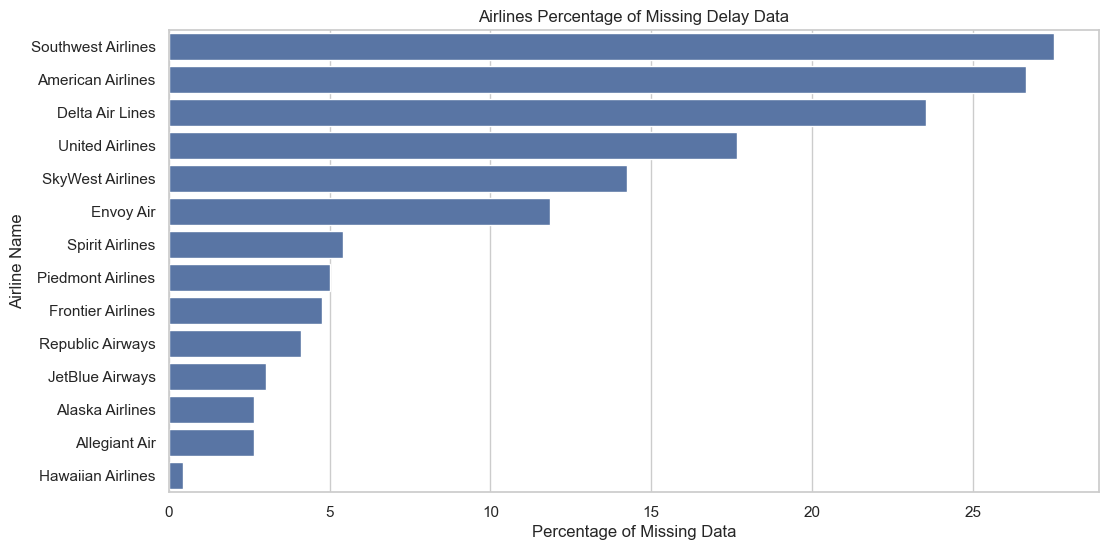

In [193]:
# Calculate the total number of flights per airline based on the number of rows for each airline
total_flights_per_airline = missing_data_summary.groupby('airline_name').size().reset_index(name='flight_count')

# Now calculate the total missing count for each airline
airline_missing_counts = missing_data_summary.groupby('airline_name')['missing_count'].sum().reset_index()

# Merge the total flights with the missing counts to calculate the missing percentage
airline_missing_counts = airline_missing_counts.merge(total_flights_per_airline, on='airline_name')
airline_missing_counts['missing_percentage'] = (airline_missing_counts['missing_count'] / airline_missing_counts['flight_count'])

# Sort by missing percentage in descending order
airline_missing_counts_sorted = airline_missing_counts.sort_values(by='missing_percentage', ascending=False)

# Plot the missing percentage by airline
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_missing_counts_sorted, 
            x='missing_percentage', 
            y='airline_name')

# Add titles and labels
plt.title('Airlines Percentage of Missing Delay Data')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Airline Name')

# Show the plot
plt.show()


In [194]:
# Investigate correlations between the missing data and other features, 
# like flight distance or time of year. 

#print(flights_data.columns)
print(missing_data_summary.columns)

print(flights_data.columns)

print(combined_data_cleaned.columns)

Index(['airline_name', 'origin_iata', 'dest_iata', 'missing_count'], dtype='object')
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed

In [195]:
weather_data.columns

Index(['latitude_orig', 'longitude_orig', 'elevation_orig', 'date',
       'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs',
       'city_orig', 'iata_orig', 'airport_name', 'latitude_dest',
       'longitude_dest', 'elevation_dest', 'prcp_dest', 'snow_dest',
       'snwd_dest', 'tmax_dest', 'tmin_dest', 'city_dest', 'iata_dest'],
      dtype='object')

Dive deeper into the specific characteristics of the flights that are missing data, such as:

Flight times: Are these flights mostly at specific times of day?
Days of the week: Are there certain days that show higher rates of missing data?
Airline performance: How do these routes compare to others in terms of delays and cancellations?
This analysis will help determine whether specific airlines or routes are associated with the missing data and identify any patterns that could inform further investigation or operational improvements.

In [197]:

# count missing values.
print(combined_data_cleaned.isnull().sum())



day_of_week          0
date                 0
op_unique_carrier    0
tail_num             0
op_carrier_fl_num    0
                    ..
total_delay_time     0
is_weekend           0
arrival_delay        0
departure_delay      0
airline_name         0
Length: 75, dtype: int64


In [198]:
combined_data_cleaned.columns


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [199]:

df = combined_data_cleaned.copy()

# Filter only numeric columns for comparison
numeric_cols = df.select_dtypes(include=['number']).columns

# Define a function to count non-zero values in a column
def count_non_zero(column):
    return (column > 0).sum()

# Group by 'origin_iata' and 'dest_iata', and apply the aggregation function only to numeric columns
grouped = df.groupby(['origin_iata', 'dest_iata'])[numeric_cols].agg(lambda x: (x > 0).sum())

# Reset the index to flatten the multi-index from the groupby operation
grouped = grouped.reset_index()

# If you want to focus on specific columns, you can filter them
columns_of_interest = [
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'arrival_delay', 'departure_delay', 'total_delay_time'
]

# Filter the grouped DataFrame for these columns if needed
grouped_filtered = grouped[['origin_iata', 'dest_iata'] + columns_of_interest]

# Display the result
print(grouped_filtered.head())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\1855490707.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['origin_iata', 'dest_iata'])[numeric_cols].agg(lambda x: (x > 0).sum())


  origin_iata dest_iata  carrier_delay  weather_delay  nas_delay  \
0         abi       abe            NaN            NaN        NaN   
1         abi       abi            NaN            NaN        NaN   
2         abi       abq            NaN            NaN        NaN   
3         abi       aby            NaN            NaN        NaN   
4         abi       ack            NaN            NaN        NaN   

   security_delay  late_aircraft_delay  arrival_delay  departure_delay  \
0             NaN                  NaN            NaN              NaN   
1             NaN                  NaN            NaN              NaN   
2             NaN                  NaN            NaN              NaN   
3             NaN                  NaN            NaN              NaN   
4             NaN                  NaN            NaN              NaN   

   total_delay_time  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [200]:
print(df[columns_of_interest].isna().sum())


carrier_delay          11990608
weather_delay          11990608
nas_delay              11990608
security_delay         11990608
late_aircraft_delay    11990608
arrival_delay                 0
departure_delay               0
total_delay_time              0
dtype: int64


In [201]:
# SAVE AS
# Save the DataFrame to a CSV file
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv'

combined_data_cleaned.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")


Data saved to C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv


In [202]:
df[columns_of_interest] = df[columns_of_interest].fillna(0)
print(df.groupby(['origin_iata', 'dest_iata']).size())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\3871479191.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['origin_iata', 'dest_iata']).size())


origin_iata  dest_iata
abi          abe          0
             abi          0
             abq          0
             aby          0
             ack          0
                         ..
xna          wys          0
             xna          0
             xwa          0
             yak          0
             yum          0
Length: 80132, dtype: int64


In [203]:
print(df[['origin_iata', 'dest_iata']].head())


  origin_iata dest_iata
0         cvg       msp
1         cvg       msp
2         cvg       msp
3         cvg       msp
4         dsm       msp


In [204]:
print(df[columns_of_interest].gt(0).sum())


carrier_delay          1787622
weather_delay           206729
nas_delay              1505834
security_delay           21419
late_aircraft_delay    1621264
arrival_delay          5311797
departure_delay        5683118
total_delay_time       3705482
dtype: int64


In [205]:
print(df.describe())  # Summary statistics for numerical columns


        day_of_week  op_carrier_fl_num  crs_dep_time      dep_time  \
count  1.511873e+07       1.511873e+07  1.511873e+07  1.511873e+07   
mean   3.979462e+00       2.330569e+03  8.204061e+02  8.230523e+02   
std    2.005737e+00       1.531463e+03  2.994821e+02  3.031140e+02   
min    1.000000e+00       1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00       1.121000e+03  5.630000e+02  5.660000e+02   
50%    4.000000e+00       2.086000e+03  8.140000e+02  8.160000e+02   
75%    6.000000e+00       3.318000e+03  1.075000e+03  1.080000e+03   
max    7.000000e+00       8.819000e+03  1.439000e+03  1.440000e+03   

           taxi_out    wheels_off     wheels_on       taxi_in  crs_arr_time  \
count  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07   
mean   1.720586e+01  1.373767e+03  1.468020e+03  7.974600e+00  9.139659e+02   
std    8.856063e+00  5.080164e+02  5.422123e+02  6.214804e+00  3.177027e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

In [206]:
# Perform the aggregation with a simpler function to test
simple_grouped = df.groupby(['origin_iata', 'dest_iata']).agg({
    'carrier_delay': lambda x: (x > 0).sum(),
    'weather_delay': lambda x: (x > 0).sum(),
    'nas_delay': lambda x: (x > 0).sum(),
    'security_delay': lambda x: (x > 0).sum(),
    'late_aircraft_delay': lambda x: (x > 0).sum(),
    'arrival_delay': lambda x: (x > 0).sum(),
    'departure_delay': lambda x: (x > 0).sum(),
    'total_delay_time': lambda x: (x > 0).sum()
}).reset_index()

# Display the result
print(simple_grouped.head())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\1225272086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  simple_grouped = df.groupby(['origin_iata', 'dest_iata']).agg({


  origin_iata dest_iata  carrier_delay  weather_delay  nas_delay  \
0         abi       abe            NaN            NaN        NaN   
1         abi       abi            NaN            NaN        NaN   
2         abi       abq            NaN            NaN        NaN   
3         abi       aby            NaN            NaN        NaN   
4         abi       ack            NaN            NaN        NaN   

   security_delay  late_aircraft_delay  arrival_delay  departure_delay  \
0             NaN                  NaN            NaN              NaN   
1             NaN                  NaN            NaN              NaN   
2             NaN                  NaN            NaN              NaN   
3             NaN                  NaN            NaN              NaN   
4             NaN                  NaN            NaN              NaN   

   total_delay_time  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [207]:
df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [208]:
# Identify Stations Reporting Patterns

In [209]:
# Group by station and count non-NaN entries for the correct columns
station_counts = df.groupby(['origin_iata', 'dest_iata'])[['tobs', 'tmax_orig', 'tmin_orig']].count()

# Now 'station_counts' will have the count of non-null values for 'tobs', 'tmax_orig', and 'tmin_orig'
print(station_counts.head())


C:\Users\hopeh\AppData\Local\Temp\ipykernel_11620\2887662049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_counts = df.groupby(['origin_iata', 'dest_iata'])[['tobs', 'tmax_orig', 'tmin_orig']].count()


                       tobs  tmax_orig  tmin_orig
origin_iata dest_iata                            
abi         abe           0          0          0
            abi           0          0          0
            abq           0          0          0
            aby           0          0          0
            ack           0          0          0


In [ ]:
# Merge station_counts back with df on ['origin_iata', 'dest_iata']
df_with_counts = df.merge(station_counts[['tobs']], left_on=['origin_iata', 'dest_iata'], right_index=True, how='left')

# Filter stations where 'tobs' count is 0
only_tmax_tmin = df_with_counts[df_with_counts['tobs'] == 0]

# Print the result
print(f"Stations reporting only tmax and tmin: {only_tmax_tmin.shape[0]}")


In [ ]:
only_tmax_tmin = df[station_counts['tobs'] == 0]
print(f"Stations reporting only tmax and tmin: {only_tmax_tmin.shape[0]}")

In [ ]:
# Find stations where 'tmax' or 'tmin' is NaN
only_tobs = station_counts[station_counts[['tmax', 'tmin']].isnull().any(axis=1)]
print(f"Stations reporting only tobs: {only_tobs.shape[0]}")

In [ ]:
only_tobs = station_counts[station_counts[['tmax', 'tmin']].isnull().any(axis=1)]
print(f"Stations reporting only tobs: {only_tobs.shape[0]}")


In [287]:
# Analyze recording patterns including tmax_orig, tmax_dest, tmin_orig, tmin_dest
def recording_pattern(row):
    # Check if there is any recorded tmax and tmin (either from origin or destination)
    if (pd.notnull(row['tmax_orig']) or pd.notnull(row['tmax_dest'])) and \
       (pd.notnull(row['tmin_orig']) or pd.notnull(row['tmin_dest'])) and \
       pd.isnull(row['tobs']):
        return 'tmax_tmin_only'
    
    # Check for tobs only (tobs present, but no tmax/tmin)
    elif pd.isnull(row['tmax_orig']) and pd.isnull(row['tmin_orig']) and \
         pd.isnull(row['tmax_dest']) and pd.isnull(row['tmin_dest']) and \
         pd.notnull(row['tobs']):
        return 'tobs_only'
    
    # If all temperature readings (tmax_orig, tmin_orig, tmax_dest, tmin_dest, and tobs) are available
    elif (pd.notnull(row['tmax_orig']) or pd.notnull(row['tmax_dest'])) and \
         (pd.notnull(row['tmin_orig']) or pd.notnull(row['tmin_dest'])) and \
         pd.notnull(row['tobs']):
        return 'all_recorded'
    
    # Catch-all for any other combinations
    else:
        return 'other'

# Apply the recording pattern function to the DataFrame
weather_data['recording_pattern'] = weather_data.apply(recording_pattern, axis=1)


In [288]:

# count recording patterns
pattern_counts = weather_data['recording_pattern'].value_counts()
print(pattern_counts)


recording_pattern
tmax_tmin_only    130780
all_recorded        8519
other               6711
tobs_only             12
Name: count, dtype: int64


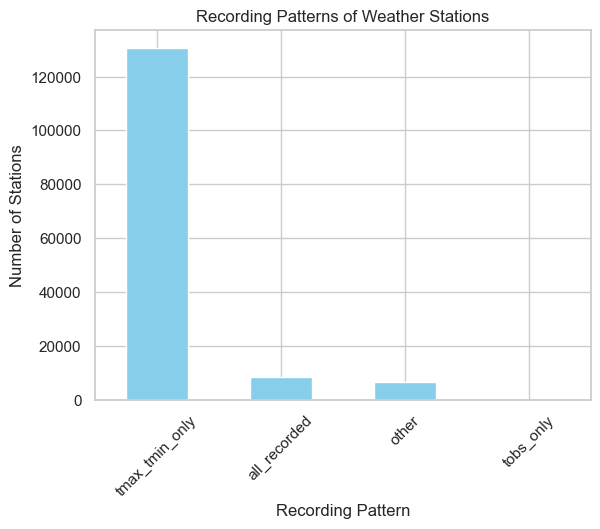

In [289]:
#  bar chart to visualize the distribution of recording patterns

pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Recording Patterns of Weather Stations')
plt.xlabel('Recording Pattern')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

In [290]:
# sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmax')
# plt.title('Comparison of tmax Across Recording Patterns')
# plt.show()

# sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmin')
# plt.title('Comparison of tmin Across Recording Patterns')
# plt.show()


In [291]:
# # Drop tobs column
# weather_data.drop(columns=['tobs'], inplace=True)
# print(weather_data.head())

In [292]:
# # Standardize column names
# flights_data.columns = flights_data.columns.str.lower().str.replace(' ', '_')
# weather_data.columns = weather_data.columns.str.lower().str.replace(' ', '_')


In [293]:
# Check how many records exist and their missing values.
print(combined_data_cleaned.isnull().sum())

# Count non-missing records
non_missing_counts = combined_data_cleaned.count()
print(non_missing_counts)

day_of_week          0
date                 0
op_unique_carrier    0
tail_num             0
op_carrier_fl_num    0
                    ..
total_delay_time     0
is_weekend           0
arrival_delay        0
departure_delay      0
airline_name         0
Length: 75, dtype: int64
day_of_week          15118733
date                 15118733
op_unique_carrier    15118733
tail_num             15118733
op_carrier_fl_num    15118733
                       ...   
total_delay_time     15118733
is_weekend           15118733
arrival_delay        15118733
departure_delay      15118733
airline_name         15118733
Length: 75, dtype: int64


In [294]:
# Check for null values in the DataFrame and filter only columns with null values
null_columns = combined_data_cleaned.isnull().sum()

# Filter out columns with no nulls, and show only the columns that have nulls
null_columns = null_columns[null_columns > 0]

# Display the columns with null values and their counts
print(null_columns)


carrier_delay                11990608
weather_delay                11990608
nas_delay                    11990608
security_delay               11990608
late_aircraft_delay          11990608
le_displaced_threshold_ft    13621073
he_displaced_threshold_ft    13694771
latitude_orig                12865978
longitude_orig               12865978
elevation_orig               12869368
prcp_orig                    12879327
snow_orig                    13163472
snwd_orig                    13477068
tmax_orig                    12916182
tmin_orig                    12916577
tobs                         15102106
latitude_dest                12865978
longitude_dest               12865978
elevation_dest               12869368
prcp_dest                    12879327
snow_dest                    13163472
snwd_dest                    13477068
tmax_dest                    12916182
tmin_dest                    12916577
iata_dest_dest               12865978
dtype: int64


In [295]:
# Check how many records exist and their missing values.
print(flights_data.isnull().sum())

# Count non-missing records
non_missing_counts = flights_data.count()
print(non_missing_counts)

day_of_week                         0
date                                0
op_unique_carrier                   0
tail_num                        42493
op_carrier_fl_num                   0
origin_iata                         0
origin_city                         0
dest_iata                           0
dest_city                           0
crs_dep_time                        0
dep_time                       163508
taxi_out                       169914
wheels_off                     169914
wheels_on                      175134
taxi_in                        175134
crs_arr_time                        0
arr_time                       175127
cancelled                           0
diverted                            0
crs_elapsed_time                    0
actual_elapsed_time            207302
air_time                       207302
flights                             0
distance                            0
distance_group                      0
carrier_delay                11970618
weather_dela

In [298]:
print(flights_data.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  dep_time  \
0         cvg  cincinnati       msp  minneapolis          1234    1225.0   
1         cvg  cincinnati       msp  minneapolis          1234    1225.0   
2         cvg  cincinnati       msp  minneapolis          1234    1225.0   
3         cvg  cincinnati       msp  minneapolis          1234    1225.0   
4         dsm  des moines       msp  minneapolis          1750    1744.0   

   taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  \
0      13.0    

In [303]:
print(weather_data.head())

   latitude_orig  longitude_orig  elevation_orig        date  prcp_orig  \
0          31.95          -85.13       86.800003  2024-01-01       0.00   
1          31.95          -85.13       86.800003  2024-01-02       0.00   
2          31.95          -85.13       86.800003  2024-01-03       0.14   
3          31.95          -85.13       86.800003  2024-01-04       0.00   
4          31.95          -85.13       86.800003  2024-01-05       0.23   

   snow_orig  snwd_orig  tmax_orig  tmin_orig  tobs  \
0        NaN        NaN       65.0       32.0   NaN   
1        NaN        NaN       55.0       27.0   NaN   
2        NaN        NaN       43.0       27.0   NaN   
3        NaN        NaN       58.0       31.0   NaN   
4        NaN        NaN       61.0       29.0   NaN   

                      city_orig iata_orig  airport_name  latitude_dest  \
0  eufaula weedon field airport       euf  weedon field          31.95   
1  eufaula weedon field airport       euf  weedon field          31.95

In [304]:
# Mapping dictionary
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Convert numeric days to day names
combined_data_cleaned['day_of_week'] = combined_data_cleaned['day_of_week'].replace(day_mapping)

# Display the updated DataFrame
print(combined_data_cleaned.head(3))

  day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0      Monday  2023-05-01                9e   n131ev               4888   
1      Monday  2023-05-01                9e   n131ev               4888   
2      Monday  2023-05-01                9e   n131ev               4888   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  dep_time  \
0         cvg  cincinnati       msp  minneapolis           754     745.0   
1         cvg  cincinnati       msp  minneapolis           754     745.0   
2         cvg  cincinnati       msp  minneapolis           754     745.0   

   taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  \
0      13.0      1238.0     1303.0      7.0           821     790.0   
1      13.0      1238.0     1303.0      7.0           821     790.0   
2      13.0      1238.0     1303.0      7.0           821     790.0   

   cancelled  diverted  crs_elapsed_time  actual_elapsed_time  air_time  \
0        0.0       0.0            

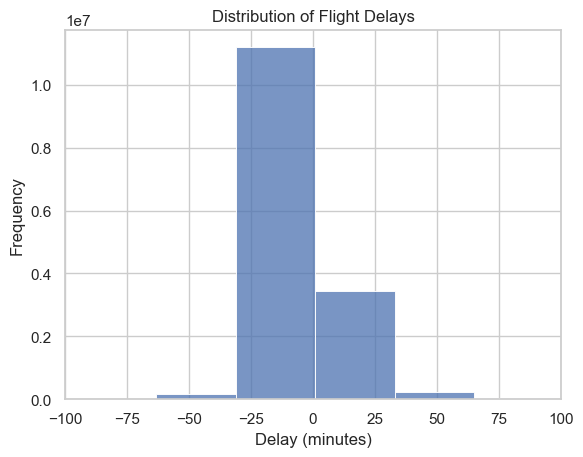

In [305]:
# Flight Delays: Analyze the distribution of flight delays.
sns.histplot(combined_data_cleaned['total_delay_time'], bins=50)
plt.title('Distribution of Flight Delays')

# Set the limits for the x-axis
plt.xlim(-100, 100)  # Adjust based on the distribution

plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


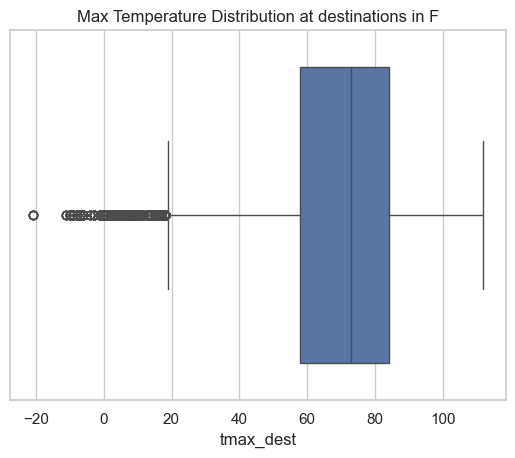

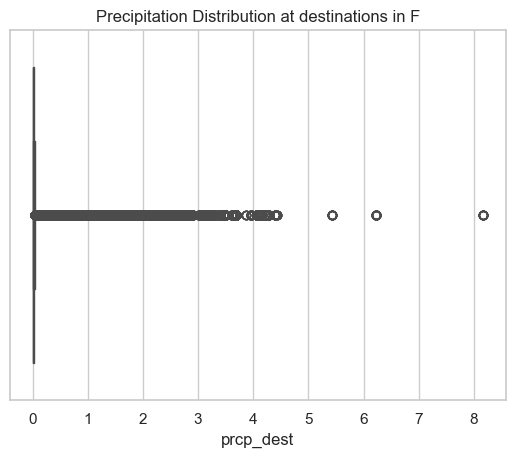

In [306]:
# Weather Variables: Analyze temperature and precipitation.

sns.boxplot(x='tmax_dest', data=combined_data_cleaned)
plt.title('Max Temperature Distribution at destinations in F')
plt.show()

sns.boxplot(x='prcp_dest', data=combined_data_cleaned)
plt.title('Precipitation Distribution at destinations in F')
plt.show()


In [307]:
combined_data_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

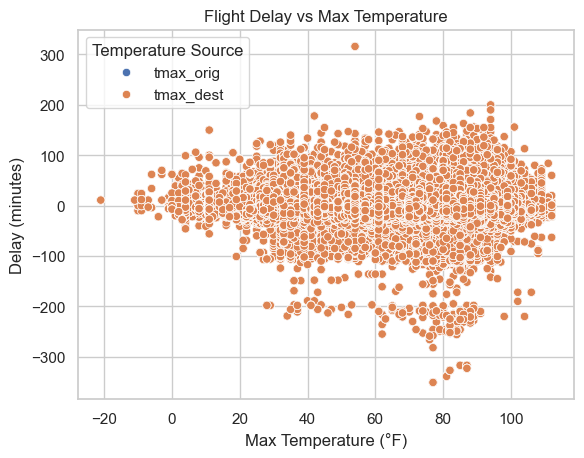

In [308]:
# Melt the data to long format (so we can plot tmax_orig and tmax_dest in one scatterplot)
melted_data = pd.melt(combined_data_cleaned, 
                      id_vars=['total_delay_time'], 
                      value_vars=['tmax_orig', 'tmax_dest'], 
                      var_name='Temperature Source', 
                      value_name='Max Temperature')

# Create the scatterplot with melted data
sns.scatterplot(x='Max Temperature', y='total_delay_time', hue='Temperature Source', data=melted_data)
plt.title('Flight Delay vs Max Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay (minutes)')
plt.show()


In [309]:
combined_data_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

Missing Data in weather_data: If weather_data does not have entries for specific dates and corresponding iata codes, any flight from flights_data that matches those criteria will not find a match, leading to NaN values.

In [311]:
nan_rows = combined_data_cleaned.isnull()
print(nan_rows)


          day_of_week   date  op_unique_carrier  tail_num  op_carrier_fl_num  \
0               False  False              False     False              False   
1               False  False              False     False              False   
2               False  False              False     False              False   
3               False  False              False     False              False   
4               False  False              False     False              False   
...               ...    ...                ...       ...                ...   
15118728        False  False              False     False              False   
15118729        False  False              False     False              False   
15118730        False  False              False     False              False   
15118731        False  False              False     False              False   
15118732        False  False              False     False              False   

          origin_iata  origin_city  des

In [312]:
print(flights_data['origin_iata'].unique())
print(weather_data['iata_orig'].unique())
print(flights_data.shape)
print(weather_data.shape)


['cvg' 'dsm' 'myr' 'mke' 'ind' 'ric' 'cho' 'bgr' 'buf' 'roc' 'cle' 'ith'
 'atl' 'evv' 'mdt' 'cae' 'avl' 'bhm' 'chs' 'ilm' 'cha' 'gtr' 'rdu' 'mbs'
 'mqt' 'azo' 'btr' 'xna' 'sgf' 'orh' 'gso' 'iad' 'alb' 'syr' 'tys' 'bqk'
 'fay' 'hsv' 'sav' 'btv' 'dlh' 'mci' 'csg' 'roa' 'pwm' 'bgm' 'cmh' 'clt'
 'tri' 'lan' 'lex' 'eyw' 'aex' 'vld' 'dhn' 'day' 'grr' 'mem' 'lse' 'mlu'
 'ags' 'gsp' 'lax' 'dfw' 'elp' 'ict' 'sat' 'pit' 'tpa' 'phl' 'vps' 'pns'
 'bna' 'sna' 'fll' 'avp' 'mia' 'ont' 'pbi' 'sdf' 'mco' 'boi' 'pdx' 'smf'
 'den' 'san' 'psp' 'fat' 'iah' 'msy' 'cos' 'rno' 'oma' 'lih' 'ama' 'rsw'
 'msn' 'eug' 'cid' 'sbp' 'dab' 'sba' 'mry' 'bfl' 'mtj' 'jac' 'ege' 'tul'
 'lbb' 'geg' 'fai' 'jnu' 'pae' 'bzn' 'rdm' 'psc' 'dal' 'cdv' 'ome' 'bet'
 'brw' 'sts' 'ktn' 'scc' 'sit' 'adq' 'otz' 'psg' 'wrg' 'hpn' 'hou' 'fca'
 'tvc' 'bil' 'mlb' 'mso' 'gnv' 'hrl' 'far' 'bis' 'tlh' 'mob' 'gpt' 'jan'
 'oaj' 'atw' 'rst' 'isp' 'ttn' 'pgd' 'mli' 'psm' 'pie' 'usa' 'fnt' 'lck'
 'sfb' 'pia' 'aza' 'shv' 'tol' 'sbn' 'iag' 'blv' 'c

It seems there are iata codes in weather_data that do not match the origin_iata codes in flights_data. For instance, if flights_data has 'cvg' as origin_iata but weather_data does not have an entry for 'cvg' on that date, the merge will result in NaN for the iata column in the combined_data for those flights. The shapes indicate that flights_data has significantly more rows (4,009,949) than weather_data (139,012). This implies that many flights may not have corresponding weather data.

In [314]:
nan_rows = combined_data_cleaned[combined_data_cleaned.isnull()]
print(nan_rows[['date', 'origin_iata','dest_iata']])


         date origin_iata dest_iata
0         NaN         NaN       NaN
1         NaN         NaN       NaN
2         NaN         NaN       NaN
3         NaN         NaN       NaN
4         NaN         NaN       NaN
...       ...         ...       ...
15118728  NaN         NaN       NaN
15118729  NaN         NaN       NaN
15118730  NaN         NaN       NaN
15118731  NaN         NaN       NaN
15118732  NaN         NaN       NaN

[15118733 rows x 3 columns]


In [315]:
combined_data_cleaned.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [316]:
# Save the DataFrame to a CSV file
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv'

combined_data_cleaned.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")
# last saved 11.7.24 at 2:22m

Data saved to C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv


In [406]:
# Correct way to read the CSV file using pandas
flights_weather_df = pd.read_csv(r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv')

# Display the first few rows to verify
print(flights_weather_df.head())


  day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0      Monday  2023-05-01                9e   n131ev               4888   
1      Monday  2023-05-01                9e   n131ev               4888   
2      Monday  2023-05-01                9e   n131ev               4888   
3      Monday  2023-05-01                9e   n131ev               4888   
4      Monday  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  dep_time  \
0         cvg  cincinnati       msp  minneapolis           754     745.0   
1         cvg  cincinnati       msp  minneapolis           754     745.0   
2         cvg  cincinnati       msp  minneapolis           754     745.0   
3         cvg  cincinnati       msp  minneapolis           754     745.0   
4         dsm  des moines       msp  minneapolis          1070    1064.0   

   taxi_out  wheels_off  wheels_on  taxi_in  crs_arr_time  arr_time  \
0      13.0      1238

Some seasonal correlations are slightly positive (e.g., Summer Arrival Delay: 0.042, Winter Departure Delay: 0.009668), but these values are still weak.

Similar to latitude, longitude also shows low correlation with delays. Most values are close to zero, indicating no significant relationship.

Explore other factors that might impact delays, such as weather conditions (precipitation, snow), airport traffic, or operational factors (e.g., carrier delays).

Consider using statistical models (like linear regression) to analyze the influence of various factors, including latitude, longitude, and weather, on flight delays.

Analysis of Seasonal Delays

Fall: Average arrival delay of about -12.40 minutes and a departure delay of about 2.84 minutes.
Spring: Average arrival delay of about -17.37 minutes, with a slightly higher departure delay.
Summer: The highest average arrival delay of about -24.16 minutes, but the departure delay is lower than in Spring.
Winter: Similar to Fall, with an average arrival delay of about -12.01 minutes and a higher departure delay than Fall.

In [373]:
# # Print correlation coefficients
# # calculate correlations between delays and latitude/longitude. 
# # The results are grouped by season to see how the relationships change.


In [375]:
# Scatter plots show the relationship between elevation and both arrival 
# and departure delays, colored by season. This helps visualize any patterns.

In [386]:

# Now, check if the columns exist and rename if necessary
# Extract relevant columns after merging
# Assuming the destination weather columns are suffixed with '_dest'

# Print columns
print("Columns in flights_weather_df:")
print(flights_weather_df.columns)

Columns in flights_weather_df:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 't

For All Flights

Total Entries: Approximately 4 million records.

Total Delay Time: The mean total delay time is negative (-5.32 minutes), indicating that, on average, flights arrived earlier than scheduled.
Arrival and Departure Delays: Both have negative means (-16.59 for arrival delay), showing that many flights may have arrived early.
Delay Variability: The standard deviations for delays are high, particularly for arrival_delay (191.32) and departure_delay (97.96), suggesting significant variability in delays.


For Outliers

Total Entries: Around 190,000 records identified as outliers.
Total Delay Time: The mean total delay time is positive (22.83 minutes), indicating that these flights were delayed on average.
Arrival Delay: The mean arrival delay is negative (-14.49 minutes), suggesting these flights still arrived early despite being categorized as outliers.
Departure Delay: The mean departure delay is positive (13.57 minutes), indicating that these flights were delayed in their takeoff.


Analyzing the Differences

Flight Performance: The fact that outliers have a higher mean total delay time while having early arrival times indicates that these flights likely had significant delays during departure.
Delay Types: The outliers have more pronounced variability in departure_delay, suggesting some flights experienced extreme delays compared to the rest.

Cancellation and Diversion:

Both cancelled and diverted columns show only 0.0, indicating that there are no cancellations or diversions in your dataset. Remove from Dataset.

In [390]:
# Drop the 'cancelled' and 'diverted' columns from the DataFrame
flights_weather_df.drop(columns=['cancelled', 'diverted'], inplace=True)

# Verify that the columns have been removed
print(flights_weather_df.columns)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'origin_state', 'dest_state', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude',
       'type_of_airport', 'elevation_ft', 'municipality', 'scheduled_service',
       'unique_id', 'id', 'length_ft', 'width_ft', 'surface', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'latitude_orig', 'longitude_orig',
       'elevation_orig', 'prcp_orig', 'snow_orig', 'snwd_orig', 'tmax_orig',
       'tmin_orig', 'tobs', 'latitude_dest', 'longitude_dest',
  

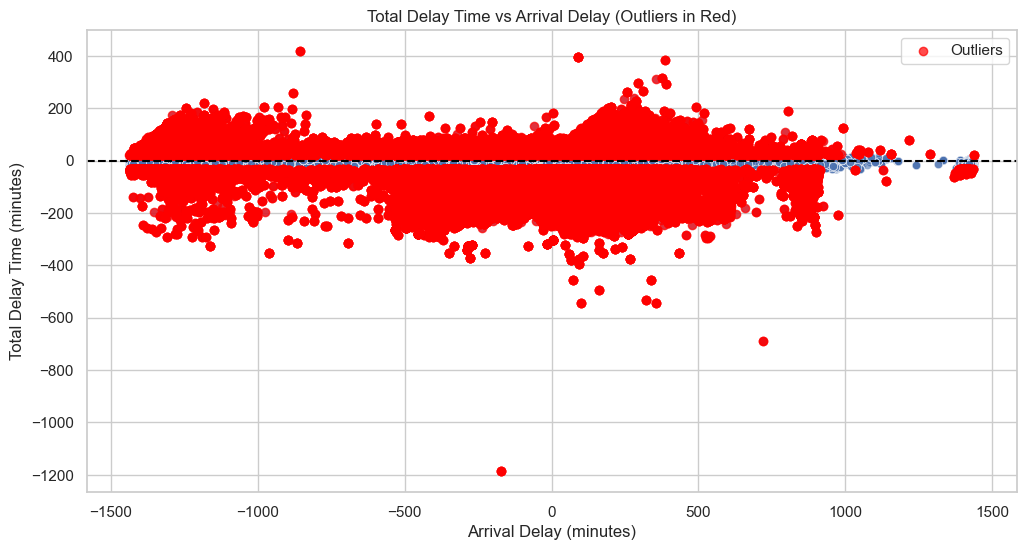

In [392]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='arrival_delay', y='total_delay_time', data=flights_weather_df, alpha=0.6)
plt.scatter(outliers['arrival_delay'], outliers['total_delay_time'], color='red', label='Outliers', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title('Total Delay Time vs Arrival Delay (Outliers in Red)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Total Delay Time (minutes)')
plt.legend()
plt.show()


In [393]:
print("Summary Statistics for All Flights:")
print(flights_weather_df.describe())

print("\nSummary Statistics for Outliers:")
print(outliers.describe())

Summary Statistics for All Flights:
       op_carrier_fl_num  crs_dep_time      dep_time      taxi_out  \
count       1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07   
mean        2.330569e+03  8.204061e+02  8.230523e+02  1.720586e+01   
std         1.531463e+03  2.994821e+02  3.031140e+02  8.856063e+00   
min         1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%         1.121000e+03  5.630000e+02  5.660000e+02  1.200000e+01   
50%         2.086000e+03  8.140000e+02  8.160000e+02  1.500000e+01   
75%         3.318000e+03  1.075000e+03  1.080000e+03  2.000000e+01   
max         8.819000e+03  1.439000e+03  1.440000e+03  2.690000e+02   

         wheels_off     wheels_on       taxi_in  crs_arr_time      arr_time  \
count  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07  1.511873e+07   
mean   1.373767e+03  1.468020e+03  7.974600e+00  9.139659e+02  8.931852e+02   
std    5.080164e+02  5.422123e+02  6.214804e+00  3.177027e+02  3.287392e+02   
min    1.000000e+

The Bureau of Transportation Statistics (BTS) typically provides flight data in a standardized format, and the times are generally recorded in Coordinated Universal Time (UTC). This means that all departure and arrival times are expressed in a single time zone, allowing for consistent comparison across different flights and time zones.

There should not be very many negative origin delays ( early takeoffs) due to the nature of operations.

In [428]:
print("Summary Statistics for All Flights after removal:")
print(delay_dest.describe())

print("\nSummary Statistics for Outliers:")
print(outliers.describe())

Summary Statistics for All Flights after removal:


NameError: name 'delay_dest' is not defined

Summary Statistics for All Flights (Post-Outlier Removal)

Arrival Delay: The mean is approximately -9.43 minutes, indicating that flights tend to arrive slightly early on average.
Departure Delay: The mean departure delay is -2.75 minutes, also suggesting early departures on average.

Weather Variables:
Average precipitation (prcp) is low (0.01298), and snow (snow) is minimal (mean 0.0187).
Maximum temperatures (tmax) and minimum temperatures (tmin) are reasonable, with maximums reaching around 112°F.

Summary Statistics for Outliers

Arrival Delay: The mean arrival delay for outliers is -14.45 minutes, which indicates that these flights tend to arrive even earlier than the overall dataset.
Departure Delay: Outliers show a significant positive mean departure delay of 13.58 minutes, indicating that these flights are more likely to be delayed when departing.

Weather Variables:
Outliers have higher average precipitation (0.02234) compared to the non-outlier flights, which may suggest that adverse weather conditions are affecting these flights.
Notable snow values (mean 0.1297) indicate that these flights might be more impacted by winter weather.

Key Comparisons
Delays: The presence of outliers is associated with higher departure delays, suggesting that these flights may face different operational challenges compared to the majority.
Weather Impact: Weather conditions appear to have a more significant effect on outlier flights, with greater precipitation and snow accumulation.


Further Analysis: Conduct additional analyses to understand the factors leading to delays in outlier flights—particularly looking into operational issues, weather patterns, and airline performance.
Data Visualization: Visualizing these statistics with box plots or histograms can help to better understand the distribution of delays and the impact of weather on flight performance.

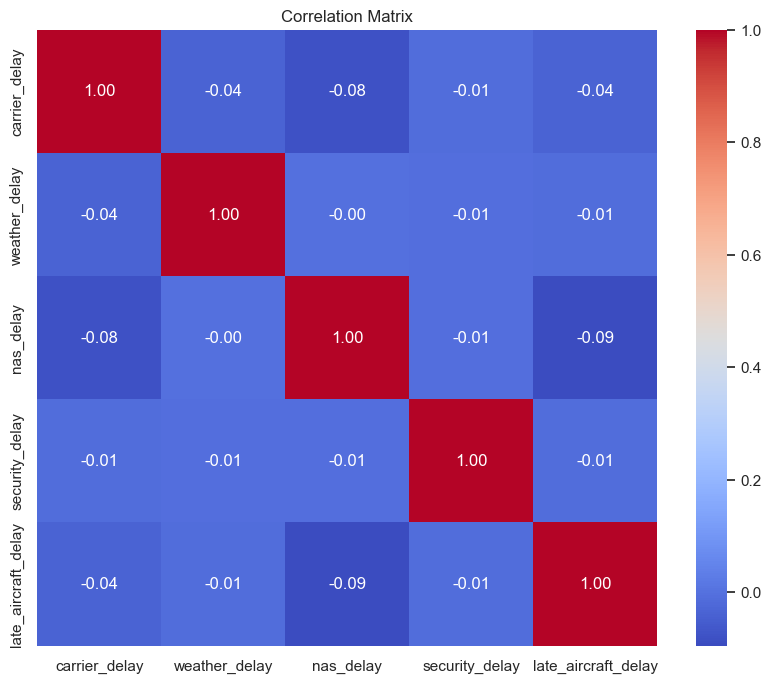

In [430]:

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Observations
Arrival Delay Correlations: There are very low correlations with elevation and precipitation. The strongest correlation (0.173481) is with departure delay. The temperature (tmax and tmin) shows a slight negative correlation, indicating that as temperatures rise, delays might slightly decrease.
Departure Delay Correlations: Similar to arrival delays, departure delays have low correlations with most weather-related variables.  The strongest correlation with other factors is also with arrival delays.
Snow and Precipitation: Snow (both at the origin and destination) shows some correlation with delays, particularly in the destination context. This suggests that snow could impact delays, even if the correlation is not very strong.
Elevation: Elevation has a very low correlation with both arrival and departure delays, suggesting that it may not be a significant factor in delay analysis for the dataset.

In [434]:
# Assuming 'flights_weather_df' is your DataFrame and it includes a column for airport identifiers
# Example: 'airport_code' could be the column that identifies airports

# Filter for non-zero snow or snwd values
reported_snow = flights_weather_df[flights_weather_df['snow_orig'] > 0]
reported_snwd = flights_weather_df[flights_weather_df['snwd_orig'] > 0]

# Get unique airport identifiers for both cases
unique_airports_snow = reported_snow['origin_iata'].unique()
unique_airports_snwd = reported_snwd['dest_iata'].unique()

# Combine unique airports from both lists
all_reported_airports = set(unique_airports_snow).union(set(unique_airports_snwd))

# Count the number of unique airports
num_reported_airports = len(all_reported_airports)

print(f"Number of airports reporting snow or snwd: {num_reported_airports}")


Number of airports reporting snow or snwd: 89


In [438]:
flights_weather_df.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_state', 'dest_state',
       'origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'type_of_airport', 'elevation_ft', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft', 'latitude_orig',
       'longitude_orig', 'elevation_orig', 'prcp_orig', 'snow_orig',
       'snwd_orig', 'tmax_orig', 'tmin_orig', 'tobs', 'latitude_de

In [442]:
# Descriptive statistics for snow and snwd
snow_orig_stats = flights_weather_df['snow_orig'].describe()
snwd_dest_stats = flights_weather_df['snow_dest'].describe()
snwd_orig_stats = flights_weather_df['snwd_orig'].describe()
snwd_orig_stats = flights_weather_df['snwd_dest'].describe()

print("Snow statistics:")
print(snow_orig_stats)
print("(snwd_orig_stats):")
print(snwd_orig_stats)


snwd_dest_stats
snwd_orig_stats



Snow statistics:
count    1.955261e+06
mean     2.708262e-02
std      3.002868e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.310000e+01
Name: snow_orig, dtype: float64
(snwd_orig_stats):
count    1.641665e+06
mean     6.418794e-02
std      5.674219e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.720000e+01
Name: snwd_dest, dtype: float64


count    1.641665e+06
mean     6.418794e-02
std      5.674219e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.720000e+01
Name: snwd_dest, dtype: float64

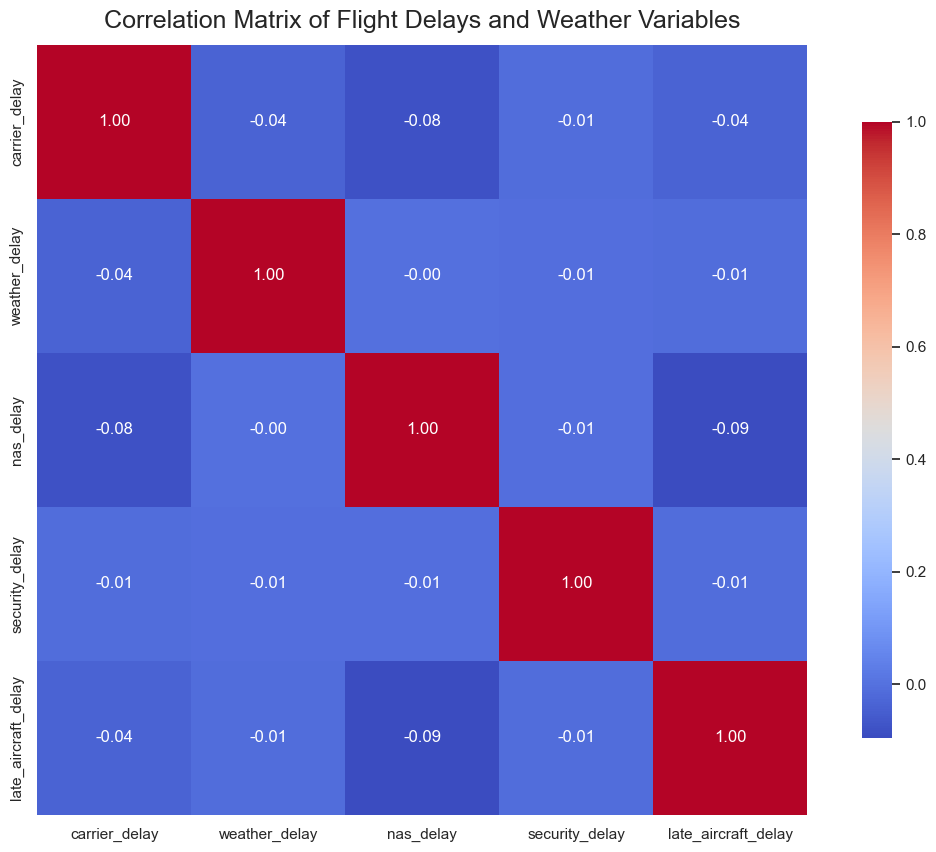

In [444]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
heatmap.set_title('Correlation Matrix of Flight Delays and Weather Variables', fontdict={'fontsize':18}, pad=12)
plt.show()

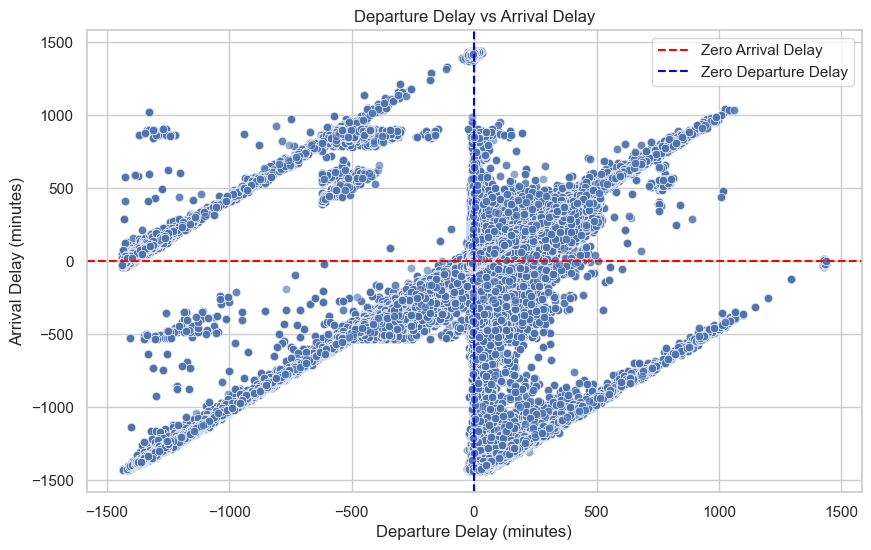

KeyError: 'departure_delay'

In [455]:
# Investigate whether a positive departure delay indicates a positive arrival delay
# Visualize the relationship between departure delay and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_weather_df, x='departure_delay', y='arrival_delay', alpha=0.6)
plt.title('Departure Delay vs Arrival Delay')
plt.axhline(0, color='red', linestyle='--', label='Zero Arrival Delay')  # Reference line for zero arrival delay
plt.axvline(0, color='blue', linestyle='--', label='Zero Departure Delay')  # Reference line for zero departure delay
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = flights_data['departure_delay'].corr(flights_data['arrival_delay'])
print(f"Correlation between Departure Delay and Arrival Delay: {correlation:.2f}")


While there is a slight tendency for flights that leave late to arrive late, other factors likely play a significant role in determining delays. This could include weather conditions, air traffic, or operational issues. 

Further Analysis:
Time of Day: Analyze if departure and arrival delays vary by time of day. Morning flights might behave differently than evening flights.
Airline Performance: Some airlines may have more consistent schedules than others. Analyze delays by airline.
Route Analysis: Look into specific routes (origin-destination pairs) to see if certain routes experience more delays.
Consider segmenting  analysis by different factors (e.g., season, weather conditions).
Investigate Outliers: Look for flights that have significantly higher or lower delays to identify patterns or anomalies.

A scatter plot of departure delay versus arrival delay could help visualize the relationship. Adding a regression line might clarify the trend.

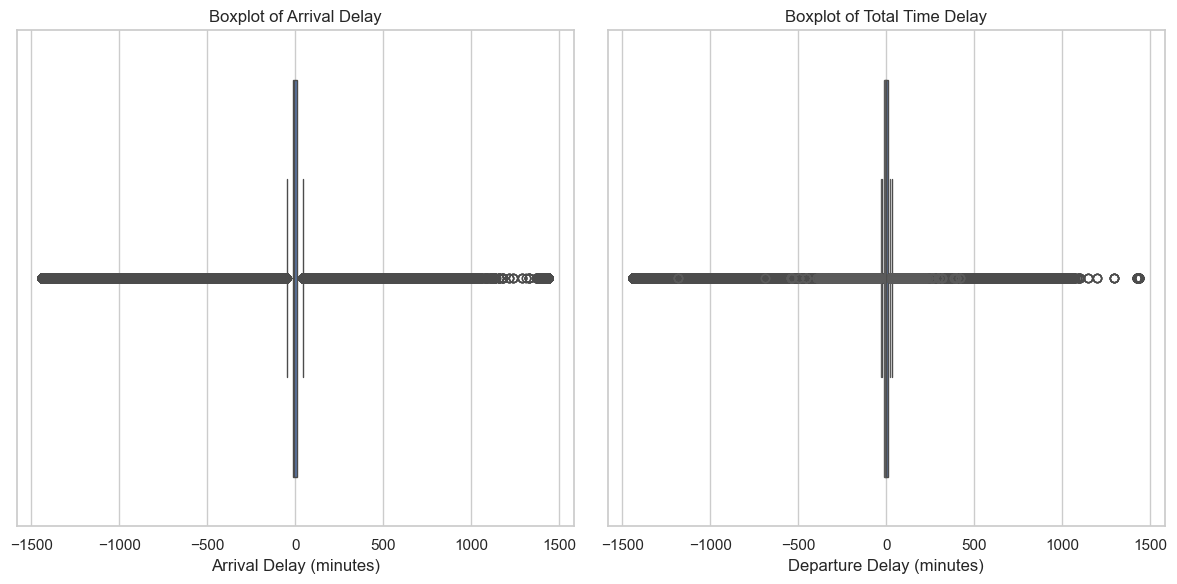

In [469]:
### Investigate outliers

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Boxplot for Arrival Delay
plt.subplot(1, 2, 1)
sns.boxplot(x=flights_weather_df['arrival_delay'])
plt.title('Boxplot of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')

# Boxplot for Departure Delay
plt.subplot(1, 2, 2)
sns.boxplot(x=flights_weather_df['departure_delay'])
plt.title('Boxplot of Departure Delay')
plt.xlabel('Departure Delay (minutes)')

# Boxplot for total time delayed
plt.subplot(1, 2, 2)
sns.boxplot(x=flights_weather_df['total_delay_time'])
plt.title('Boxplot of Total Time Delay')
plt.xlabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()


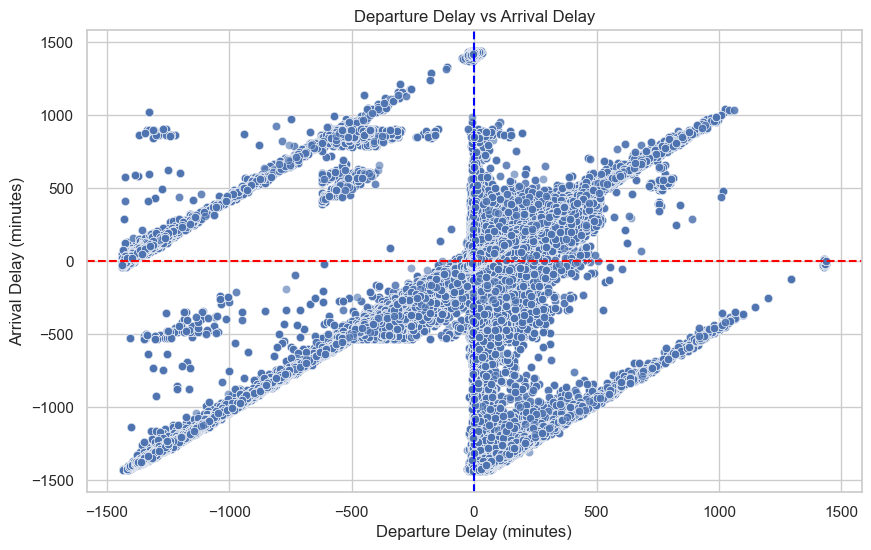

In [470]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_weather_df, x='departure_delay', y='arrival_delay', alpha=0.6)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.axhline(0, color='red', linestyle='--')  # Reference line for zero arrival delay
plt.axvline(0, color='blue', linestyle='--')  # Reference line for zero departure delay
plt.show()


In [471]:
# Cluster Analysis:



# Prepare the data for clustering
X = flights_weather_df[['departure_delay', 'arrival_delay']].dropna()

# Fit K-Means with a specified number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3)
flights_weather_df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=full_data, x='departure_delay', y='arrival_delay', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Clusters of Departure vs Arrival Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='blue', linestyle='--')
plt.show()


NameError: name 'full_data' is not defined

<Figure size 1000x600 with 0 Axes>

Interpretation of Results
Cluster 0:

Departure Delay: Approximately 4.8 minutes
Arrival Delay: Approximately 2.9 minutes
Elevation: 176.7 feet
Precipitation: 0.098 inches
Snow: 0.037 inches
This cluster has relatively low average delays for both departure and arrival.

Cluster 1:

Departure Delay: Approximately -87.8 minutes (indicating flights are departing early on average)
Arrival Delay: Approximately -1314.4 minutes (indicating substantial early arrivals, which might need verification or further analysis)
Elevation: 113.4 feet
Precipitation: 0.174 inches
Snow: 0.053 inches
The negative values suggest that flights in this cluster are consistently arriving and departing significantly earlier than expected.

Cluster 2:

Departure Delay: Approximately -69.0 minutes
Arrival Delay: Approximately 1296.9 minutes (also indicating significant early arrivals)
Elevation: 98.0 feet
Precipitation: 0.104 inches
Snow: 0.078 inches
Similar to Cluster 1, this cluster shows a pattern of early departures but also high arrival delays, suggesting a potential outlier situation that warrants closer examination.

Next Steps for Analysis
Investigate Negative Delays:

Check if there are any data entry errors or outliers leading to these extreme negative values. Review the raw data for clusters 1 and 2.
Analyze Common Characteristics:

Continue with the common characteristics analysis to see if certain airlines, routes, or times of day are predominant in these clusters. This could help explain the delays observed.
Visualize Data:

Create visualizations (e.g., box plots or scatter plots) to better understand the distributions of delays within each cluster and identify any patterns.
Correlation Analysis:

Analyze how factors such as weather conditions (precipitation and snow) correlate with delays in each cluster.
Further Segment Analysis:

If any interesting trends emerge from the above analyses, consider further segmenting the data based on these insights (e.g., by specific routes or airlines) to explore delays in more detail.

In [477]:


# Look for common characteristics
common_characteristics = flights_weather_df.groupby('cluster').agg({
    'op_unique_carrier': lambda x: x.mode()[0],  # Most common airline in the cluster
    'op_carrier_fl_num': lambda x: x.mode()[0],    # Most common flight number in the cluster
    'dep_time': lambda x: x.mode()[0],  # Most common departure time
    'arr_time': lambda x: x.mode()[0],  # Most common arrival time
    'crs_dep_time': lambda x: x.mode()[0],  # Most common scheduled departure time
    'crs_arr_time': lambda x: x.mode()[0],  # Most common scheduled arrival time
    'actual_elapsed_time': lambda x: x.mode()[0]  # Most common length of elapsed flight times
}).reset_index()

print("\nCommon Characteristics by Cluster:")
print(common_characteristics)

# Merge average delays and common characteristics
cluster_analysis = average_delays.merge(common_characteristics, on='cluster')
print("\nCluster Analysis Summary:")
print(cluster_analysis)




Common Characteristics by Cluster:
   cluster op_unique_carrier  op_carrier_fl_num  dep_time  arr_time  \
0        0                wn               1100     816.0     907.0   
1        1                aa               2749    1364.0       1.0   
2        2                aa                 98     816.0     907.0   

   crs_dep_time  crs_arr_time  actual_elapsed_time  
0           360          1320                124.0  
1          1350          1439                124.0  
2          1439          1439                124.0  


NameError: name 'average_delays' is not defined

In [ ]:
# Identify features to use for modeling, considering their correlation with delays.

In [ ]:
# Mean, Sum, Count: For time-based features, calculate statistics over certain time windows.
df['daily_mean_delay'] = df.groupby('date')['arrival_delay'].transform('mean')


In [ ]:
#review weather data
weather_data.columns  # Check available columns


In [ ]:

# Visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=weather_data['temperature'])  # Replace with relevant column
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

plt.show()

Investigate Delay Causes: Further analysis can identify reasons for significant delays, focusing on factors like weather conditions, airport congestion, and airline performance.
Comparative Analysis: Compare delays across different airlines, airports, or time periods to identify patterns and areas for improvement.

## Continue on data_wrangling_and_eda2.ipynb